In [1]:
import scipy.io
from scipy.io import loadmat
import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
def calibration_plots(matlab: str):

    data = loadmat(matlab)
    gt = data['gainTime']
    gws = data['gainWinSoln']
    gcs = data['gainChanSoln']
    gain_type = data['gainType']

    n_times = len(gt)
    n_ants = len(gws[0])
    n_spws = len(gws[0][0])
    n_chans = len(gcs[0][0][0])

    utc_midpts = []
    for t in range(len(gt)):
        midpt = 0.5 * (gt[t][0].real + gt[t][0].imag)
        utc_midpts.append((midpt%1)*24)

    colors = ['blue','r','y','purple','orange','g','m','c']

    chan_bit = 7
    if all(bit == 0 for bit in (gain_type & (2**chan_bit))):
        chan_bit = 0
    spw_bit = 6
    if all(bit == 0 for bit in (gain_type & (2**spw_bit))):
        spw_bit = 1

    #plotting bandpass gain solutions for amplitude and phase
    fig, ax = plt.subplots(nrows=n_ants, ncols=1, sharex=True, figsize=(4.5,12))
    fig2, ax2 = plt.subplots(nrows=n_ants, ncols=1, sharex=True, figsize=(4.5,12))

    max_amp = 0

    for time in range(n_times):
        if (gain_type & (2**chan_bit))[time] != 0:
            for ant in range(n_ants):

                #shifting for cosmetics
                pos = ax[ant].get_position()
                pos.x0 += 0.15
                pos.x1 += 0.15
                pos2 = ax2[ant].get_position()
                pos2.x0 += 0.05
                pos2.x1 += 0.05
                ax2[ant].set_position(pos2)

                #no x axis ticks
                ax[ant].xaxis.set_tick_params(labelbottom=False)

                for spw in range(n_spws):
                    amp_to_plot = [abs(a) for a in gcs.copy()[time][ant][spw]]
                    pha_to_plot = [np.angle(p, deg=True) for p in gcs.copy()[time][ant][spw]]
                    if max(amp_to_plot) > max_amp:
                        max_amp = max(amp_to_plot)

                    x_axis = np.arange(spw * n_chans + 1, (1 + spw) * n_chans + 1)

                    ax[ant].scatter(x_axis, amp_to_plot, c=colors[spw], s=20, marker='x', linewidths=2)
                    ax2[ant].scatter(x_axis, pha_to_plot, c=colors[spw], s=20, marker='x', linewidths=2)

                    ax[ant].yaxis.set_label_position('right')
                    ax2[ant].yaxis.set_label_position('right')
                    ax[ant].set_ylabel(f'Ant{ant+1}')
                    ax2[ant].set_ylabel(f'Ant{ant+1}')

    plt.setp(ax, yticks=np.arange(0, max_amp+1, 0.5))
    plt.setp(ax2, yticks=[-180,-120,-60,0,60,120,180])
    fig.suptitle('Bandpass gain solutions for amplitude', y=0.92)
    fig2.suptitle('Bandpass gain solutions for phase', y=0.92)
    fig.supxlabel('Full antenna bandwidth', y=0.07)
    fig2.supxlabel('Full antenna bandwidth', y=0.07)
    fig.supylabel('Gain amplitude')
    fig2.supylabel('Gain phase')

    fig.savefig('../html/bp_amp.jpg')
    fig2.savefig('../html/bp_pha.jpg')

    plt.close()

    #plotting gain solutions for amplitude and phase
    n_rows = math.ceil(n_ants / 2)
    n_cols = 2

    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, sharex=True, figsize=(8.5,6))
    fig2, ax2 = plt.subplots(nrows=n_rows, ncols=n_cols, sharex=True, figsize=(8.5,6))

    max_amp, min_time, max_time = 0, float('inf'), 0

    for spw in range(n_spws):
        for ant in range(n_ants):
            amp_to_plot, pha_to_plot = [], []

            if ant < n_rows:
                    row, col = ant, 0
            else:
                row, col = ant % n_rows, 1

            for time in range(n_times):
                if gain_type[time] & (2**6) != 0:
                    amp_val = abs((gws.copy())[time][ant][spw])
                    pha_val = np.angle((gws.copy())[time][ant][spw], deg=True)
                    amp_to_plot.append(amp_val)
                    pha_to_plot.append(pha_val)

                    if amp_val > max_amp:
                        max_amp = amp_val

                    t = utc_midpts[time]
                    if t < min_time:
                        min_time = t
                    if t > max_time:
                        max_time = t

                    ax[row, col].scatter([t], amp_to_plot, c=colors[spw], s=4)
                    ax2[row, col].scatter([t], pha_to_plot, c=colors[spw], s=4)

                    ax[row, col].yaxis.set_label_position('right')
                    ax2[row, col].yaxis.set_label_position('right')
                    ax[row, col].set_ylabel(f'Ant{ant+1}')
                    ax2[row, col].set_ylabel(f'Ant{ant+1}')
                    amp_to_plot, pha_to_plot = [], []

    plt.setp(ax, xticks=np.arange(min_time//1, math.ceil(max_time), 1), yticks=np.arange(0, max_amp+1, 0.5))
    plt.setp(ax2, xticks=np.arange(min_time//1, math.ceil(max_time), 1), yticks=[-180,-120,-60,0,60,120,180])
    fig.suptitle('Gain solutions for amplitude')
    fig2.suptitle('Gain solutions for phase')
    fig.supxlabel('UT hours')
    fig2.supxlabel('UT hours')
    fig.supylabel('Gain amplitude')
    fig2.supylabel('Gain phase')

    fig.savefig('../html/g_amp.jpg')
    fig2.savefig('../html/g_pha.jpg')

    plt.close()

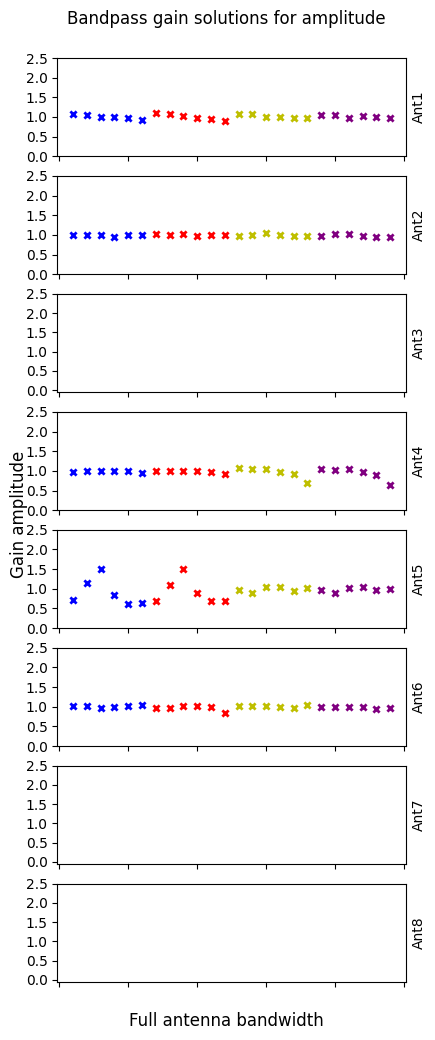

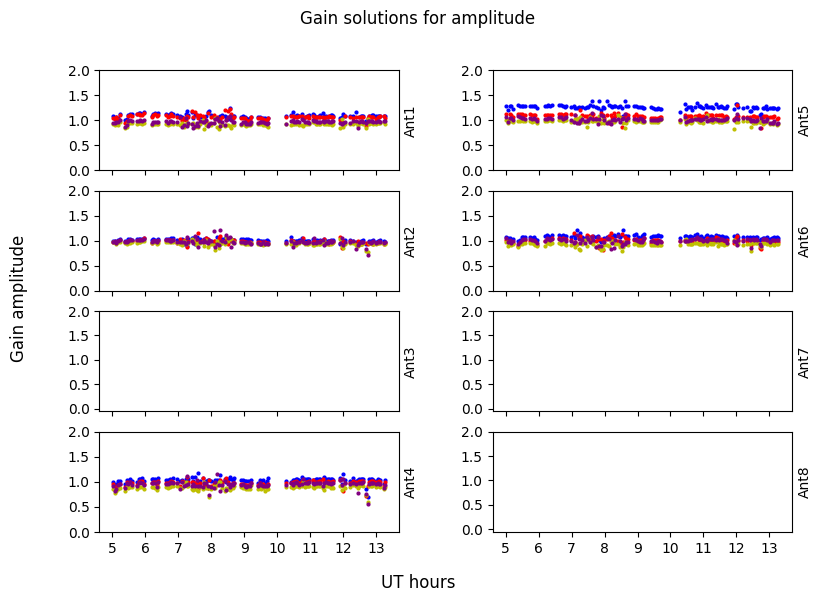

In [3]:
calibration_plots('../data/250611_03:56:34/gains.mat')